In [1]:
# import statements and functions to clean columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import tqdm
import folium
from collections import Counter
%matplotlib inline
pd.set_option('display.max_columns', None)

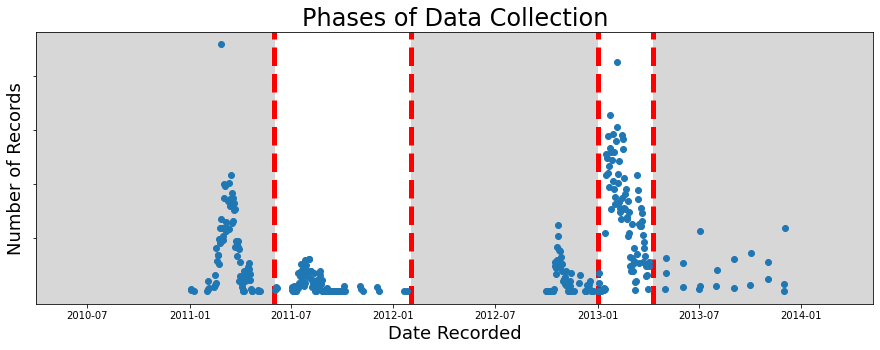

In [3]:
# creates a graph indicating the number of records collected on each
# day of the collection period.

df = pd.read_csv('tanzania_water_pump.csv')
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
population = df.groupby('date_recorded', as_index = False).agg({"population": "sum"})
plt.figure(figsize=(15,5))
plt.title('Phases of Data Collection', fontsize=24)
plt.ylabel('Number of Records', fontsize=18)
plt.yticks(ticks=[50000, 100000, 150000, 200000], labels=[])
plt.xlabel('Date Recorded', fontsize=18)
plt.xlim(14700, 16200)
plt.axvspan(14700, 15126, color='lightgray', alpha=0.9)
plt.axvspan(15372, 15705, color='lightgray', alpha=0.9)
plt.axvspan(15805, 16200, color='lightgray', alpha=0.9)
plt.axvline(dt.date(month=6, day=1, year=2011), ymin=0, ymax=1, color='r', linestyle='--', linewidth=5)
plt.axvline(dt.date(month=2, day=1, year=2012), ymin=0, ymax=1, color='r', linestyle='--', linewidth=5)
plt.axvline(dt.date(month=1, day=1, year=2013), ymin=0, ymax=1, color='r', linestyle='--', linewidth=5)
plt.axvline(dt.date(month=4, day=10, year=2013), ymin=0, ymax=1, color='r', linestyle='--', linewidth=5)
plt.savefig('data-collection-phases')
plt.plot_date(population.date_recorded, population.population)

plt.show()

Text(0.5, 1.0, 'Pump Status By Basin')

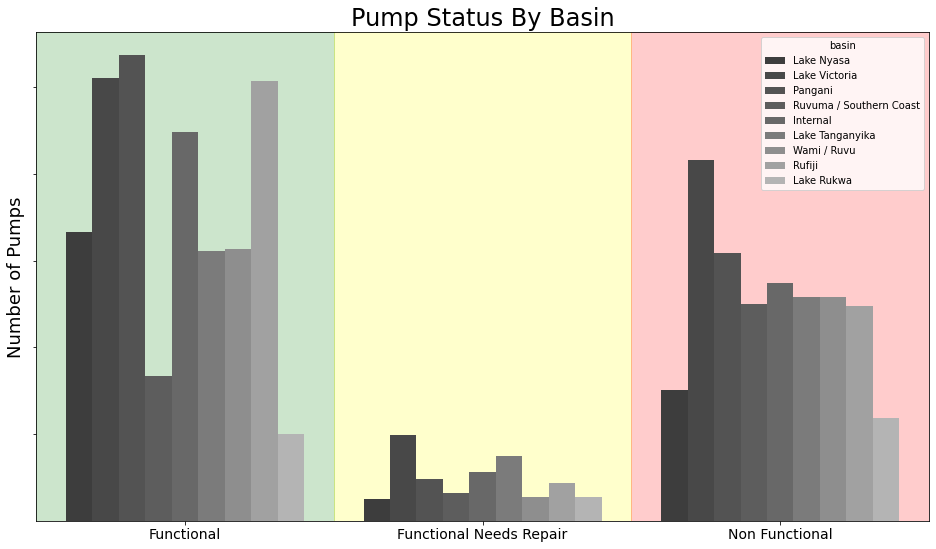

In [4]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
plt.axvspan(-.5, .5, color='green', alpha=0.2)
plt.axvspan(.5, 1.5, color='yellow', alpha=0.2)
plt.axvspan(1.5, 2.5, color='red', alpha=0.2)
countplot = sns.countplot(x='status_group', 
              hue='basin', 
              order=['functional', 'functional needs repair', 'non functional'],
              data=load_data(), 
              ax=ax, 
              palette=sns.color_palette("Greys_d", n_colors=9))
plt.yticks(ticks=[1000, 2000, 3000, 4000, 5000], labels=[])
plt.xticks(ticks=[0, 1, 2], labels=['Functional', 'Functional Needs Repair', 'Non Functional'], fontsize=14)
plt.ylabel('Number of Pumps', fontsize=18)
plt.xlabel('')
plt.savefig('pump-status-by-basin.png')
ax.set_title('Pump Status By Basin', fontsize=24)